# SI 618 - Homework #6: Machine Learning 1

Version 2023.11.01.1.CT

In this homework exercise you will apply the machine learning techniques we've covered so far: 
machine learning pipelines, dimension reduction, and clustering.

You will be using the [customer personality analysis dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) from Kaggle.

**NOTE:** This is a fairly involved homework assignment and we *strongly* urge you to not leave this to the last minute.
We suggest that you try to work on this assignment over several days.

A reminder (from the syllabus):
> Unless stated otherwise in an assignment, you are permitted to use generative AI (e.g. ChatGPT, Copilot, etc.) but you must indicate  that you did so in the work that you submit.  **If you fail to 
>  disclose your use of generative AI you will receive a grade of
> zero on the assignment**.

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [391]:
MY_UNIQNAME = 'divyams' # fill this in with your uniqname

## Task 1 (10 points):
Perform exploratory data analyses on the variables in this dataset.  Your work should include both
numerical **and** graphical overviews of the data.  Explain your findings.  

In [392]:
import warnings
warnings.filterwarnings('ignore')

In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score

In [394]:
# insert your code here.  You may use multiple cells if you wish.
marketing=pd.read_csv('marketing_campaign.csv', sep='\t')

In [395]:
print(marketing.shape)
marketing.head()

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [396]:
marketing.shape

(2240, 29)

In [397]:
marketing.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [398]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [399]:
marketing.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [400]:
marketing.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Inference from Numeric Analysis:
<font color=magenta>
1. In the dataset, only Income feature has null values and that is for 24 rows.

2. From the numeric analysis, it is noted that customers on average have done more purchases from Store, and 2nd highest from Web. It shows the trend that people like to shop more from store, in-person and then from website. Catalog purchases are the lowest.

3. Among spending patterns, we observe that the average spending is highest on wines ($ 303.93) while 2nd highest was on Meat products ($166.95) and then on Gold ($44.0). The lowst spending was on Fruits ($26.3) and Sweet Products ($27.0).

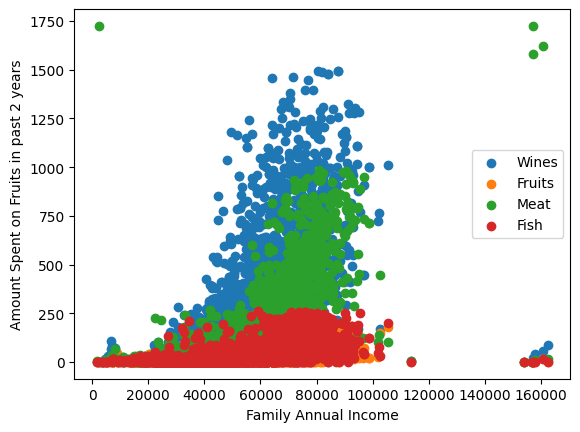

In [401]:
plt.scatter(marketing[marketing['Income']<500000]['Income'],marketing[marketing['Income']<500000]['MntWines'], label='Wines')
plt.xlabel("Family Annual Income")
plt.ylabel("Amount Spent on Wines in past 2 years")

plt.scatter(marketing[marketing['Income']<500000]['Income'],marketing[marketing['Income']<500000]['MntFruits'], label='Fruits')
plt.xlabel("Family Annual Income")
plt.ylabel("Amount Spent on Fruits in past 2 years")

plt.scatter(marketing[marketing['Income']<500000]['Income'],marketing[marketing['Income']<500000]['MntMeatProducts'], label='Meat')
plt.xlabel("Family Annual Income")
plt.ylabel("Amount Spent on Fruits in past 2 years")

plt.scatter(marketing[marketing['Income']<500000]['Income'],marketing[marketing['Income']<500000]['MntFishProducts'], label='Fish')
plt.xlabel("Family Annual Income")
plt.ylabel("Amount Spent on Fruits in past 2 years")
plt.legend()

### <span style="color:red">Plot Interpretation - </span>
<font color=magenta>

* There is a trend that suggests higher family annual income is associated with greater expenditure on Wines, as indicated by the blue points that extend vertically with increasing income. This could imply that individuals with higher income may have a preference for or are more likely to purchase wines.

*  Meat also shows a similar trend as Wine, just that the spending on Meat is not as high as Wine, probably due to per unit cost of Wine being significantly higher. For Fruits (green points) and Fish (orange points), while there is some increase in spending with income, the relationship is not as strong as with Wines. This could indicate that these items are more of a necessity and bought by families across different income levels, but the tendency to spend more on them does not increase to the same extent with higher income.

* There are a few potential outliers in the data, particularly in the Wines category, where some families with high annual income spend significantly less than others. There are also outliers in the lower income range with high spending on Wines, which could represent occasional splurges or misreported data.

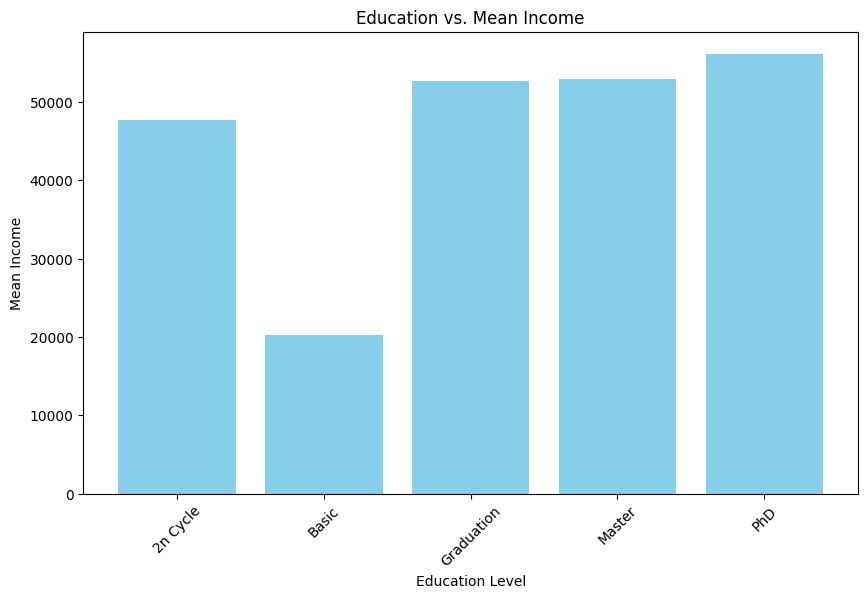

In [402]:
# Group the data by unique values in the "Education" column and calculate the mean income for each group
education_income_mean = marketing.groupby('Education')['Income'].mean()

# Get the unique education levels
unique_education_levels = education_income_mean.index

# Create a bar plot (histogram) for education vs. mean income
plt.figure(figsize=(10, 6))
plt.bar(unique_education_levels, education_income_mean, color='skyblue')
plt.title("Education vs. Mean Income")
plt.xlabel("Education Level")
plt.ylabel("Mean Income")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### <span style="color:red">Plot Interpretation - </span>

<font color=magenta>

* The chart shows a general trend where mean income increases with higher levels of education. Individuals with a "PhD" have the highest mean income, followed by those with a "Master's" degree, and the mean income is low for those with a "Basic" education level.

* Interestingly, individuals with "2n Cycle" education have a higher mean income than those with a "Basic" level. This might suggest that "2n Cycle" education provides specialized skills or qualifications that are valued in the job market, potentially leading to higher earnings.

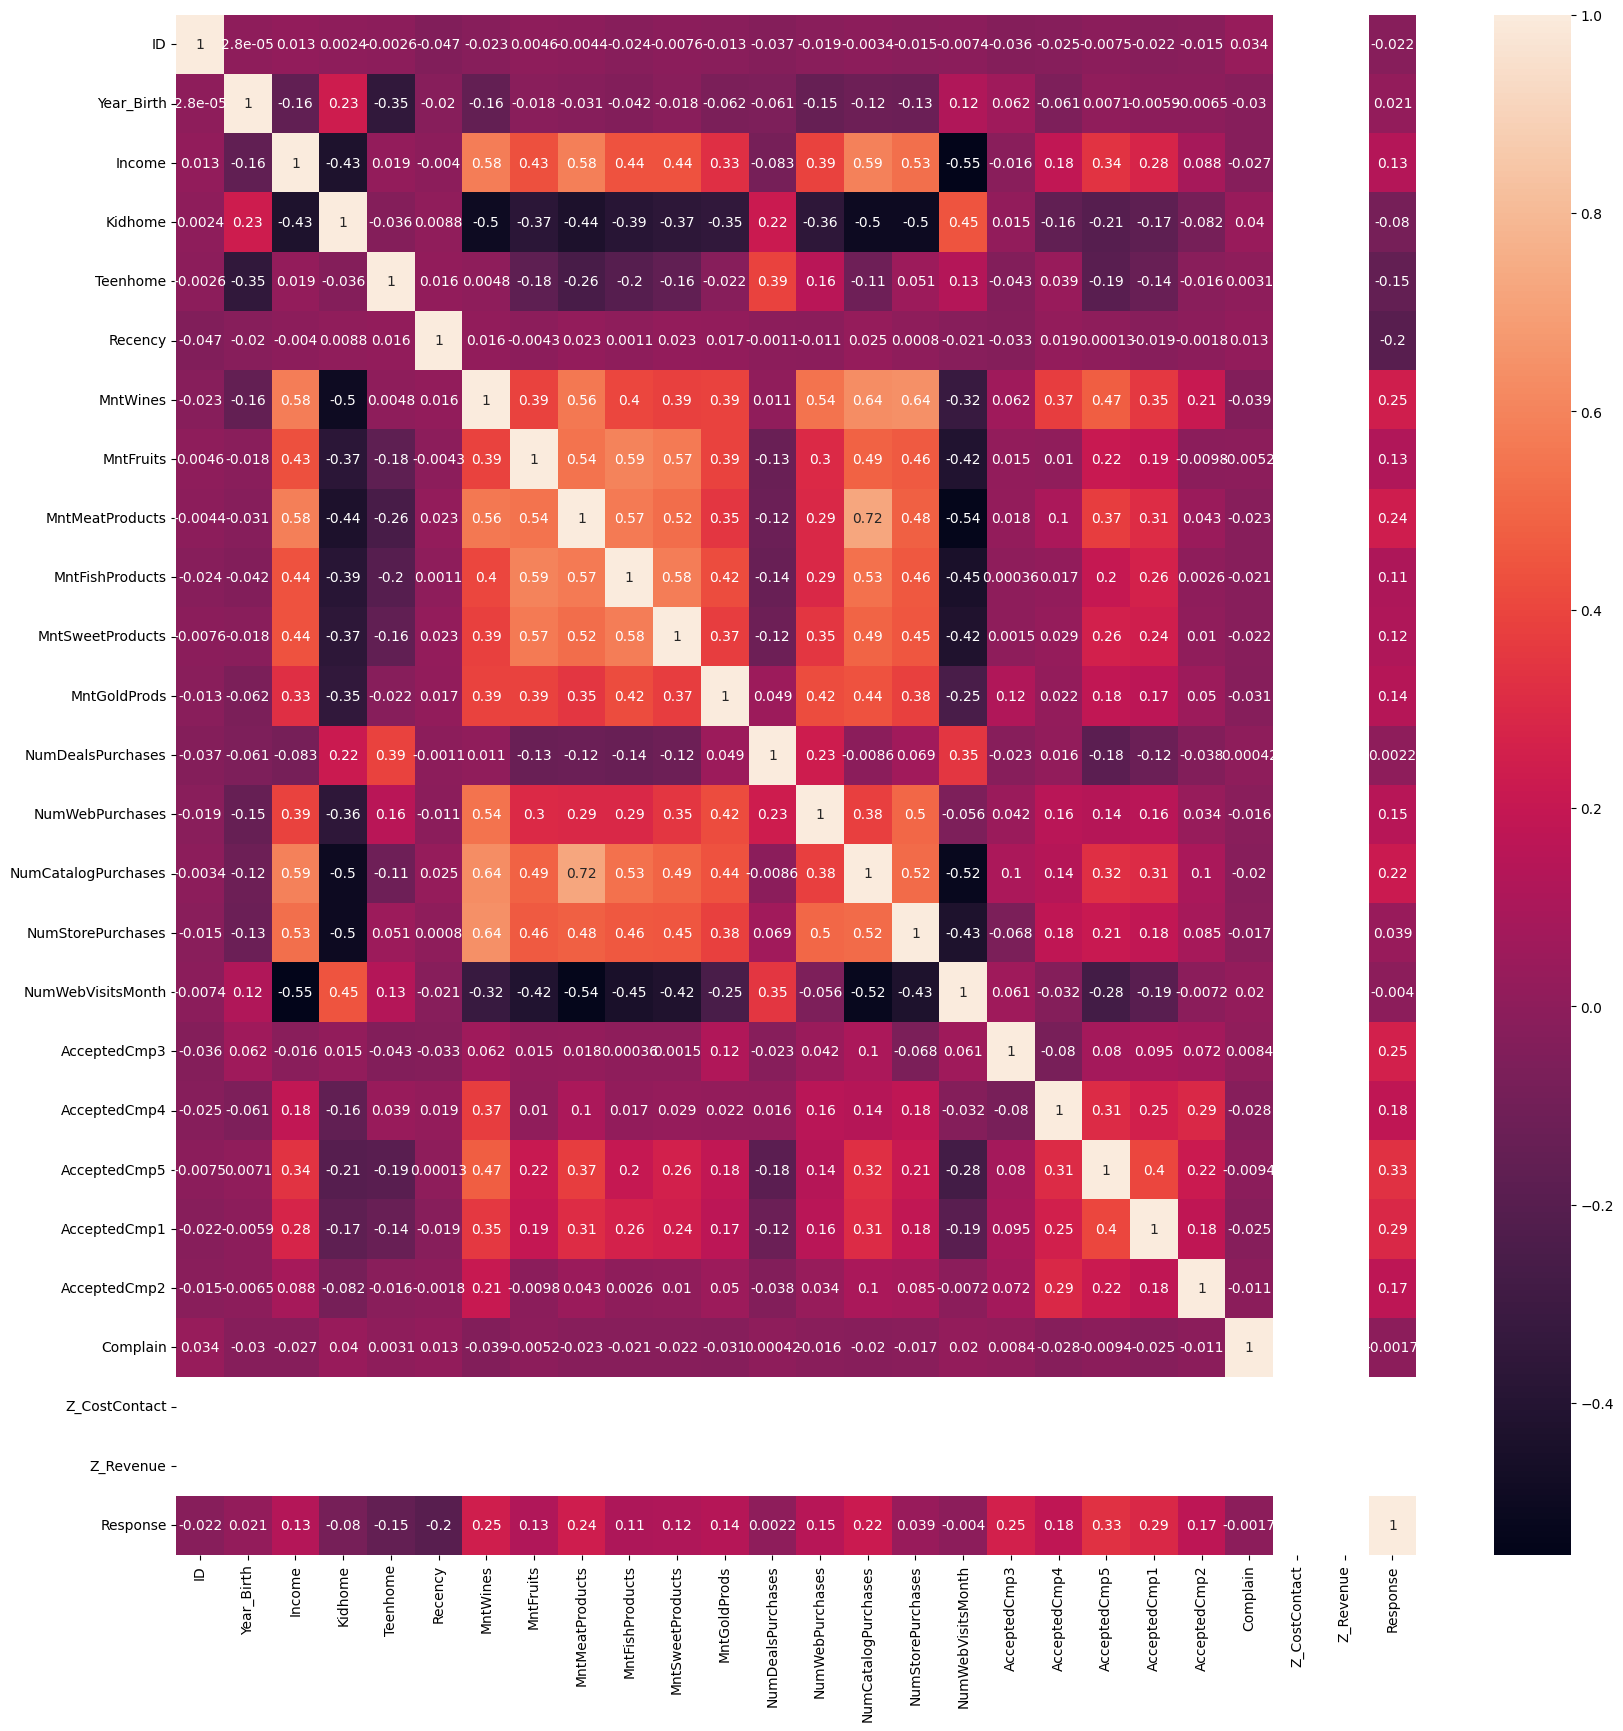

In [403]:
plt.figure(figsize=(20,20))
sns.heatmap(marketing.corr(numeric_only=True), annot=True)
plt.show()

### <span style="color:red">Heatmap Interpretation - </span>
* The heatmap shows a matrix of correlation coefficients between various variables in a dataset. Dark red areas indicate strong positive correlations, while dark purple areas suggest strong negative correlations. Most variables have weak to moderate correlations with each other, as indicated by the lighter shades.
*  Notably, there are few variables with very high positive or negative correlations, which suggests that there may be no redundant variables in the dataset that convey the same information.

<b>Strong Positive Correlation Example:</b> There is a strong positive correlation (0.58) between Income and Amount Spent on Wines, indicating these variables tend to increase together, which seems quite probable.

<b>Strong Negative Correlation Example:</b> Conversely, there is a strong negative correlation (-0.54) between Amount Spent on Meat Products and Number of Website Visits, implying that people don't shop meat online. Also, spending on other food products as well have a negative correlation with Number of Web Visits while the number of Deal Purchases has a positive correlation (0.35) signifying that people use website mostly for deal purchases only.

### <span style="color:red">EDA performed as follows: - </span>
- Checking the shape of the dataset
- Finding the number of unique values present in each column
- Checking if any `NaN` is present in columns
- Doing a numeric describe and observing and drawing inferences from it
- Making some plots regarding different fields in the data (scatter and bar plot) for inferences
- Correlation Heat Map

## Task 2 (1 point): Drop all columns that have constant values.

In [404]:
# insert your code here
const_cols=[col for col in marketing.columns if marketing[col].nunique()==1]
print("Dropping Columns:", const_cols)
marketing.drop(const_cols, axis=1, inplace=True)

Dropping Columns: ['Z_CostContact', 'Z_Revenue']


In [405]:
marketing['Age']=2023-marketing['Year_Birth']
# marketing.drop('Year_Birth', axis=1, inplace=True)
marketing.drop(['ID','Year_Birth','Dt_Customer'], axis=1, inplace=True)
marketing.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,0,1,66
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,69
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,58
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,39
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,42


### <span style="color:red">Task 2 Interpretation - </span>
* The solution identifies and removes columns from the dataset that have constant values, which in this case are 'Z_CostContact' and 'Z_Revenue'. Removing these columns is beneficial because constant features do not provide any information for statistical models.
* Additionally also dropping ID and Dt_customer column as they are irrelevant and dropped Year_Birth as well after converting a replacement column of Age which makes sense to have a demographic measure.

## Task 3 (1 point):
Create a new variable `In_Relationship` whose value is 1 if the value of `Marital_Status` is "Married" or "Together" and 0 otherwise.  Drop the `Marital_Status` column.

In [406]:
# insert your code here
def relationship(row):
    if row['Marital_Status']=="Married" or row['Marital_Status']=="Together":
        return 1
    else:
        return 0

In [407]:
marketing['In_Relationship']=marketing.apply(relationship, axis=1)
marketing.drop('Marital_Status', axis=1, inplace=True)

In [408]:
marketing['In_Relationship']

0       0
1       0
2       1
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: In_Relationship, Length: 2240, dtype: int64

### <span style="color:red">Task 3 Interpretation - </span>
* The solution above successfully creates a binary indicator variable named 'In_Relationship' that categorizes individuals as either being in a relationship (1) or not (0), based on their Marital_Status.

## Task 4 (3 points):
Impute missing income values with the median income.  Explain your results (i.e. what the median value was, how many values were imputed, how reliable you think the median value is, etc.).

Median Income: 51381.5
Number of Missing Values Before Imputation: 24
Number of Missing Values After Imputation: 0
Summary Statistics Before Imputation:
 count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

Summary Statistics After Imputation:
 count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64


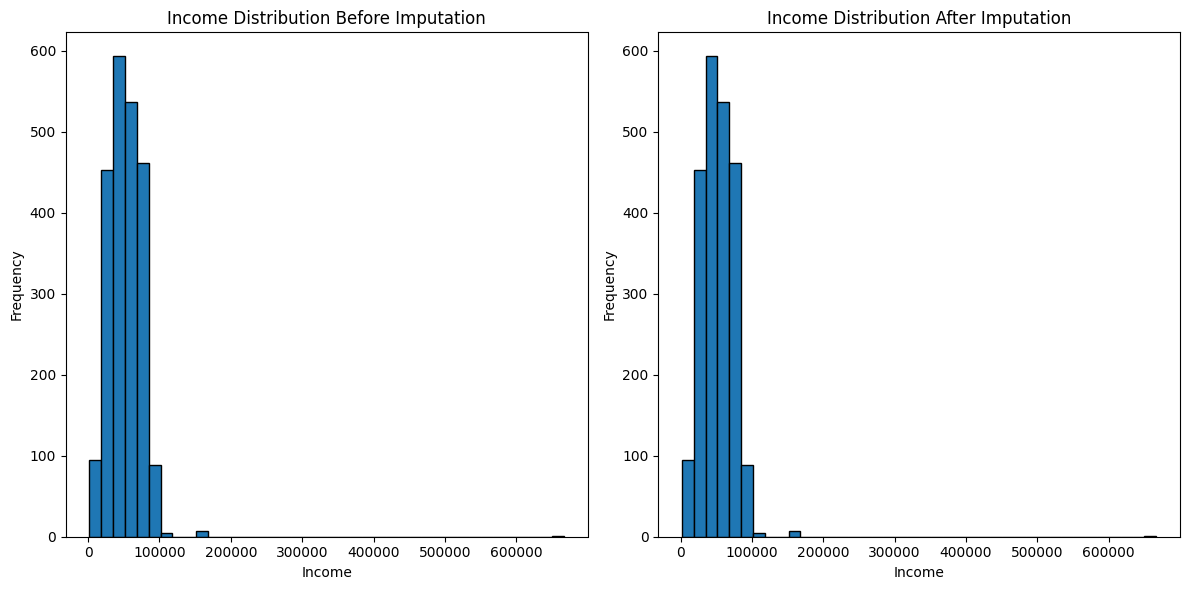

In [409]:
# Insert your code here
missing_values_before = marketing['Income'].isnull().sum()
summary_stats_before = marketing['Income'].describe()

median_income = marketing['Income'].median()

marketing['Income'].fillna(median_income, inplace=True)

missing_values_after = marketing['Income'].isnull().sum()
summary_stats_after = marketing['Income'].describe()


# Analyzing the results
print(f"Median Income: {median_income}")
print(f"Number of Missing Values Before Imputation: {missing_values_before}")
print(f"Number of Missing Values After Imputation: {missing_values_after}")

# Display summary statistics before and after imputation
print("Summary Statistics Before Imputation:\n", summary_stats_before)
print("\nSummary Statistics After Imputation:\n", summary_stats_after)


# Assessing the reliability of the median value
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Income Distribution Before Imputation')
marketing['Income'].plot(kind='hist', bins=40, edgecolor='k')
plt.xlabel('Income')

plt.subplot(1, 2, 2)
plt.title('Income Distribution After Imputation')
marketing['Income'].plot(kind='hist', bins=40, edgecolor='k')
plt.xlabel('Income')

plt.tight_layout()
plt.show()

<font color=magenta>

1. We noticed in the EDA and above as well that Income has missing values for 24 rows.
2. Replaced with Median Income: 51381.5
2. For the reliability check of the median value, I have printed the statistics of Income feature as well as plotted the distribution of data before and after imputation.
<br>        We observe that mean of the data or the income distribution is not affected significantly, hence is safe to be used as an imputed value in place of the 24 null instances.

## Task 5 (15 points):
Use scikit-learn to conduct a linear regression that models the amount spend on wine (`MntWines`) based on `Income` and whether they are in a relationship (`In_Relationship`).  Assess how good your model is by reporting the root mean squared error (RMSE) using the test dataset from an 80-20 train-test-split of the original dataset.  Explain what your value of RMSE means, and comment on how good you think your model is based on the RMSE value means.

In [410]:
# insert your code here

X = marketing[['Income', 'In_Relationship']]
y = marketing['MntWines']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 263.61704688252837


<font color=magenta size=3>
Insert your explanation and interpretation here.


1. To set context, RMSE measures the average difference between values predicted by a model and the actual values.
2. Hence, generally the lower the RMSE, the better is the model's accuracy in predicting correctly, as lower RMSE implies closer predicted values to the actual values.
3. Here, the RMSE is 263.6, which seems pretty bad considering the mean amount spent on wines is also around ~ 300 dollars.

</font>

## Task 6 (20 points):
Conduct an agglomerative clustering analysis to find 4 clusters using average linkage based on PCA projections of the original data onto 5 dimensions (use one-hot encoding on your categorical variables, and remember to scale your data before doing the PCA).  Report the percentage of variance retained in the first 5 principal components. 

Do not create a dendrogram. Instead, create a scatterplot of the first two principal components, colored by cluster membership.  Comment on the results of your clustering analysis.

Repeat the above steps using 7 clusters.  Compare the results to the 4 cluster solution.  Which solution do you prefer and why?

Keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster? (Hint: a groupby() by cluster membership might be helpful here.)

In [411]:
# # insert your code here
categorical_cols = marketing.select_dtypes(include=['object', 'category']).columns
numeric_cols = marketing.columns.difference(categorical_cols)


numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False))
])

preprocessor=ColumnTransformer(
    transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
    ])

# Create the PCA pipeline
pca = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=5))
])

#Fit and transform the data using the PCA pipeline
X_pca = pca.fit_transform(marketing)


In [412]:
explained_variance_ratio = pca.named_steps['pca'].explained_variance_ratio_
explained_variance = np.sum(explained_variance_ratio) * 100
print(f"Percentage of variance retained in the first 5 principal components: {explained_variance:.2f}%")

Percentage of variance retained in the first 5 principal components: 52.64%


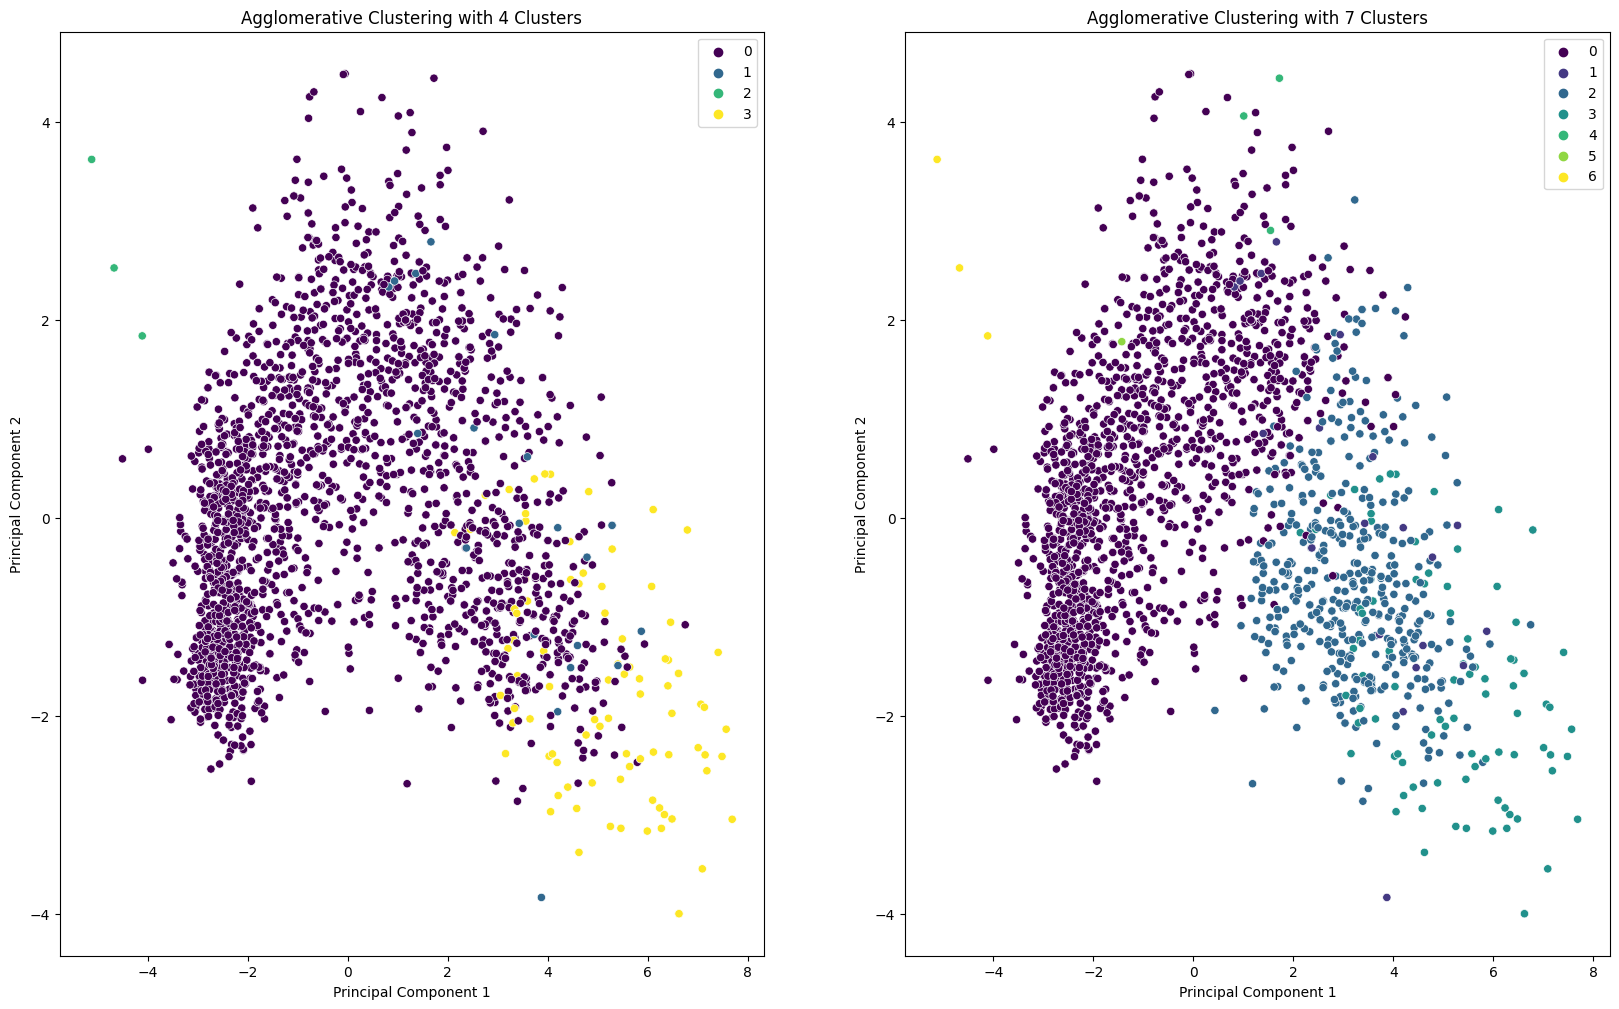

In [415]:
# Agglomerative Clustering model with 4 clusters and average linkage
cluster_model_4 = AgglomerativeClustering(n_clusters=4, linkage='average')
cluster_labels_4 = cluster_model_4.fit_predict(X_pca)
marketing['Clusters_4']=cluster_labels_4

# Agglomerative Clustering model with 7 clusters and average linkage
cluster_model_7 = AgglomerativeClustering(n_clusters=7, linkage='average')
cluster_labels_7 = cluster_model_7.fit_predict(X_pca)
marketing['Clusters_7']=cluster_labels_7

# scatterplot of the first two principal components
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels_4, palette='viridis', legend='full')
plt.title('Agglomerative Clustering with 4 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# plt.show()

# Scatterplot of the first two principal components
# plt.figure(figsize=(10, 6))
plt.subplot(1,2,2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels_7, palette='viridis', legend='full')
plt.title('Agglomerative Clustering with 7 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [416]:
# Group by cluster to create customer segments
segments4 = marketing.drop('Clusters_7', axis=1).groupby('Clusters_4')
segments4.describe().T

Clusters_4                        0             1            2             3
Income          count   2123.000000     23.000000     3.000000     91.000000
                mean   50712.886481  72434.652174  4593.666667  84283.835165
                std    24484.890560  13908.549064  3187.545503  11837.019280
                min     2447.000000  48192.000000  1730.000000  49118.000000
                25%    34616.500000  59551.500000  2876.500000  78125.000000
...                             ...           ...          ...           ...
In_Relationship min        0.000000      0.000000     0.000000      0.000000
                25%        0.000000      0.000000     0.000000      0.000000
                50%        1.000000      1.000000     0.000000      1.000000
                75%        1.000000      1.000000     0.500000      1.000000
                max        1.000000      1.000000     1.000000      1.000000

[192 rows x 4 columns]

In [417]:
for name, group in segments4:
    print(f"Segment 4: Cluster {name}")
    print(group.describe())

Segment 4: Cluster 0
              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2123.000000  2123.000000  2123.000000  2123.000000  2123.000000   
mean    50712.886481     0.465850     0.526142    49.300047   271.401319   
std     24484.890560     0.542394     0.545437    29.040288   302.974197   
min      2447.000000     0.000000     0.000000     0.000000     0.000000   
25%     34616.500000     0.000000     0.000000    24.000000    22.000000   
50%     50183.000000     0.000000     1.000000    50.000000   158.000000   
75%     65832.500000     1.000000     1.000000    74.000000   448.000000   
max    666666.000000     2.000000     2.000000    99.000000  1449.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2123.000000      2123.000000      2123.000000       2123.000000   
mean     24.575130       151.211964        35.302402         25.186057   
std      37.904593       209.970184        52.912372         39.577073  

In [418]:
segments7 = marketing.drop('Clusters_4', axis=1).groupby('Clusters_7')
segments7.describe().T

Clusters_7                        0             1             2             3  \
Income          count   1653.000000     23.000000    465.000000     91.000000   
                mean   43770.014217  72434.652174  75345.712903  84283.835165   
                std    17267.698855  13908.549064  29981.333158  11837.019280   
                min     3502.000000  48192.000000   2447.000000  49118.000000   
                25%    31163.000000  59551.500000  68655.000000  78125.000000   
...                             ...           ...           ...           ...   
In_Relationship min        0.000000      0.000000      0.000000      0.000000   
                25%        0.000000      0.000000      0.000000      0.000000   
                50%        1.000000      1.000000      1.000000      1.000000   
                75%        1.000000      1.000000      1.000000      1.000000   
                max        1.000000      1.000000      1.000000      1.000000   

Clusters_7                        4             5            6  
Income          count      3.000000      2.000000     3.000000  
                mean   59682.000000  48411.000000  4593.666667  
                std     8266.451294  16646.707843  3187.545503  
                min    50898.000000  36640.000000  1730.000000  
                25%    55868.500000  42525.500000  2876.500000  
...                             ...           ...          ...  
In_Relationship min        1.000000      0.000000     0.000000  
                25%        1.000000      0.000000     0.000000  
                50%        1.000000      0.000000     0.000000  
                75%        1.000000      0.000000     0.500000  
                max        1.000000      0.000000     1.000000  

[192 rows x 7 columns]

In [419]:
for name, group in segments7:
    print(f"Segment 4: Cluster {name}")
    print(group.describe().T)

Segment 4: Cluster 0
                      count          mean           std     min      25%  \
Income               1653.0  43770.014217  17267.698855  3502.0  31163.0   
Kidhome              1653.0      0.583182      0.548944     0.0      0.0   
Teenhome             1653.0      0.623714      0.542364     0.0      0.0   
Recency              1653.0     49.081065     28.919329     0.0     24.0   
MntWines             1653.0    200.223230    271.081013     0.0     14.0   
MntFruits            1653.0     11.599516     19.081209     0.0      1.0   
MntMeatProducts      1653.0     67.683001     87.991380     0.0     11.0   
MntFishProducts      1653.0     16.207502     26.526106     0.0      2.0   
MntSweetProducts     1653.0     11.756806     20.178685     0.0      1.0   
MntGoldProds         1653.0     31.810647     42.011699     0.0      6.0   
NumDealsPurchases    1653.0      2.624319      1.852572     0.0      1.0   
NumWebPurchases      1653.0      3.708409      2.761445     0.0    

<font color=magenta>

<b>Task 6 Interpretation:</b>

Inference of segments in 4-cluster agglomerative clustering:

Here we observe:
* C0 has median income ~50k while there spending on Wines in the past 2 years is ~$270 while C0 has the most number of customers which is 2123.
* C1 has median income ~72k while there spending on Wines in the past 2 years is ~$1036 while C1 has 23 customers. One interesting observation here is that C1 has all customers with no kids at their home.
* C2 has median income ~4.6k while there spending on Wines in the past 2 years is ~$26 while C2 has 3 customers only.
* C3 has median income ~84k while there spending on Wines in the past 2 years is ~$886 while C2 has 91 customers.



<b>4-Cluster Scatterplot Interpretation:</b>
* The 4-cluster solution reveals a relatively clear distinction between clusters. The variance percentages would inform us how much of the original data's variance is retained by the PCA, which is crucial for understanding the clustering's validity. High variance retention means the clusters are likely to be representative of true patterns in the higher-dimensional space.
* There's some degree of overlap between clusters, particularly noticeable between what's designated as clusters 0 and 1. 
This overlap might indicate that while there are distinctions, some data points share characteristics that make them not entirely separable in the reduced space.

<b>7-Cluster Scatterplot Interpretation:</b>
* Increasing the number of clusters to 7 results in a finer subdivision of the data. This could be beneficial if the underlying structure of the data is complex, but it also increases the risk of overfitting, where clusters may not represent meaningful separations in the original data space.
* The additional clusters (especially clusters 4, 5, and 6) are less distinct from one another, which could indicate that the separation of data points is more nuanced and not as pronounced as in the 4-cluster solution.

<b>Comparison and Preference:</b>
* Comparing the two solutions, the 4-cluster solution seems to have more distinct and well-separated clusters, which may be easier to interpret and could provide a clearer high-level understanding of the data structure.
8 The 7-cluster solution, while more detailed, has clusters that are less well-defined and could reflect over-segmentation or reveal finer distinctions that are important for certain applications.

<font color=magenta>



## Task 7 (20 points):
Conduct a k-means clustering of the data.  Pre-process the data using a 5-dimensional PCA (use one-hot encoding on your categorical values and remember to scale your data before doing the PCA). Use the average silhouette score to determine the optimal number of clusters and show the silhouette plot for the clustering solution using the optimal number of clusters.

Again, keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster? (Hint: a groupby() by cluster membership might be helpful here.)

Compare the results to the agglomerative clustering you did in the previous task.  Which solution do you prefer and why?

Silhouette score for k=2 is: 0.38303340921288265
Silhouette score for k=3 is: 0.3194432452332751
Silhouette score for k=4 is: 0.3272081101598097
Silhouette score for k=5 is: 0.25459603971215605
Silhouette score for k=6 is: 0.2681031136973029
Silhouette score for k=7 is: 0.2601785744953828
Silhouette score for k=8 is: 0.25381832994306525
Silhouette score for k=9 is: 0.24946463081180223
Silhouette score for k=10 is: 0.2633579834586926
Optimal k: 2
Silhouette score for optimal k: 0.38303340921288265


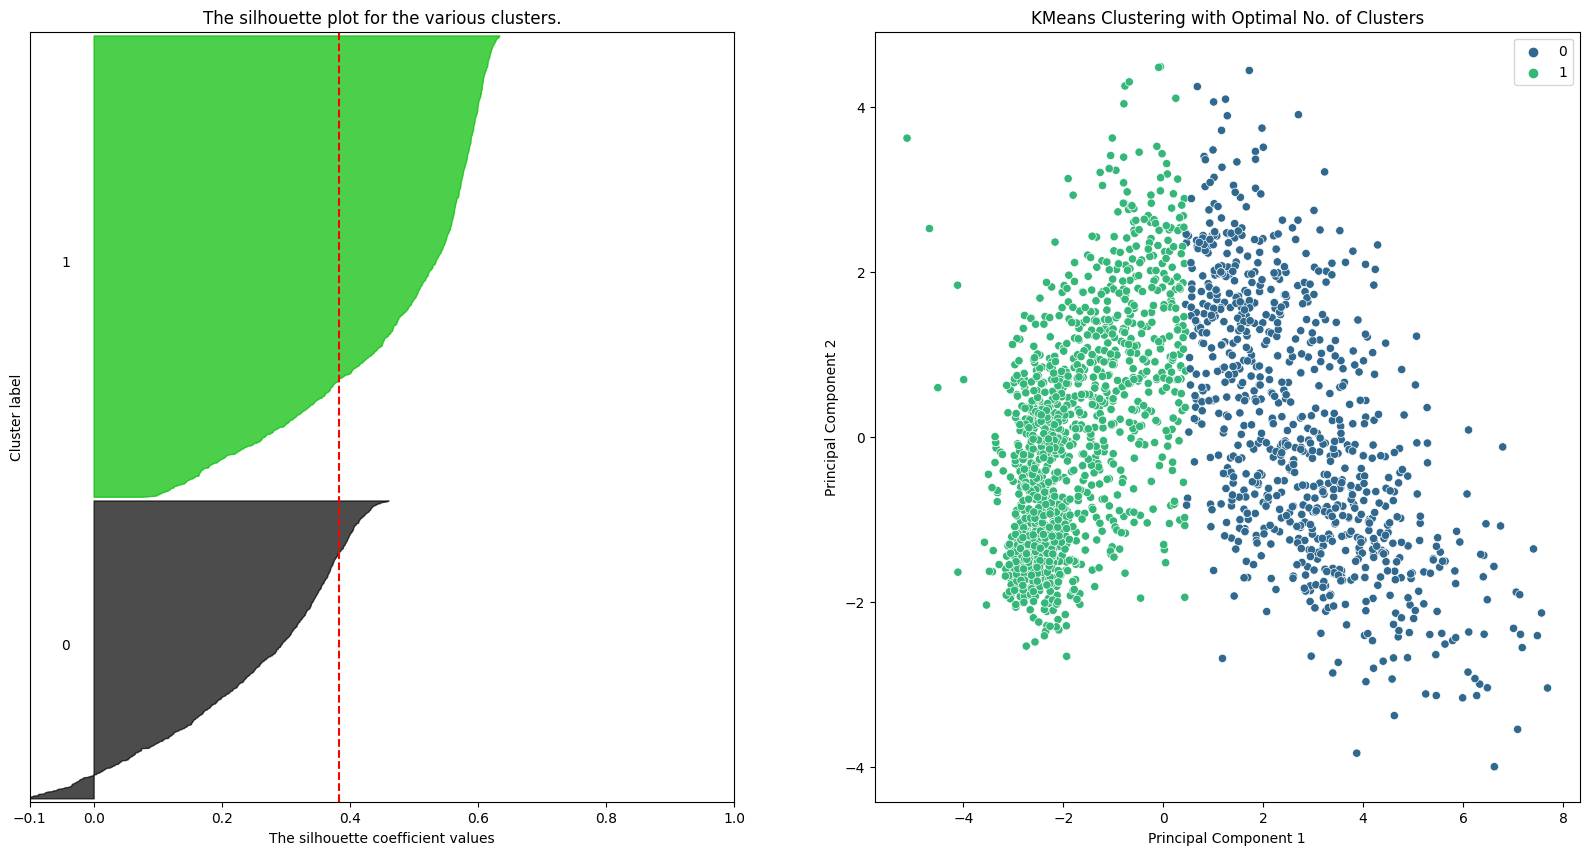

In [420]:
# insert your code here
# KMeans Clustering model with 4 clusters
k_values=range(2,11)
silhouette_scores={}

for k in k_values:
    kmeans=KMeans(n_clusters=k).fit(X_pca)
    labels=kmeans.labels_
    silhouette_scores[k]=silhouette_score(X_pca, labels)
    print(f"Silhouette score for k={k} is: {silhouette_scores[k]}")

optimal_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Optimal k: {optimal_k}")
print(f"Silhouette score for optimal k: {silhouette_scores[optimal_k]}")

cluster_model = KMeans(n_clusters=optimal_k)
kmeans_labels = cluster_model.fit_predict(X_pca)
marketing['kmeans_Clusters']=kmeans_labels

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Silhouette plot
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_xlim([-0.1, 1])
ax[0].set_ylim([0, len(X_pca) + (optimal_k + 1) * 10])

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

y_lower = 10
for i in range(optimal_k):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.nipy_spectral(float(i) / optimal_k)
    ax[0].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    ax[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for the 0 samples gap
    
ax[0].set_title("The silhouette plot for the various clusters.")
ax[0].set_xlabel("The silhouette coefficient values")
ax[0].set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax[0].axvline(x=silhouette_scores[optimal_k], color="red", linestyle="--")
ax[0].set_yticks([])  # Clear the yaxis labels / ticks
ax[0].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# scatterplot of the first two principal components
plt.subplot(1,2,2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', legend='full')
plt.title('KMeans Clustering with Optimal No. of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [364]:
segments_kmeans=marketing.drop(['Clusters_4','Clusters_7'],axis=1).groupby('kmeans_Clusters')
for name, group in segments_kmeans:
    print(f"Segment 4: Cluster {name}")
    print(group.describe())


Segment 4: Cluster 0
                 ID         Income     Kidhome    Teenhome     Recency  \
count    880.000000     880.000000  880.000000  880.000000  880.000000   
mean    5611.284091   72207.956818    0.065909    0.422727   49.460227   
std     3233.528823   23936.101006    0.252805    0.534099   28.873082   
min        0.000000    2447.000000    0.000000    0.000000    0.000000   
25%     2844.500000   63879.000000    0.000000    0.000000   25.000000   
50%     5490.500000   71608.500000    0.000000    0.000000   51.000000   
75%     8554.750000   79800.750000    0.000000    1.000000   73.000000   
max    11112.000000  666666.000000    2.000000    2.000000   99.000000   

          MntWines   MntFruits  MntMeatProducts  MntFishProducts  \
count   880.000000  880.000000       880.000000       880.000000   
mean    606.007955   56.640909       365.852273        80.357955   
std     315.818771   48.405033       248.433529        64.755937   
min       1.000000    0.000000         3

<font color=magenta size=3>

<b>Silhouette Plot Interpretation:</b>
* The silhouette score for the 2-cluster solution is the highest among the tested range, which suggests that the data is most appropriately partitioned into two clusters.
* The silhouette plot displays a thick silhouette for cluster 1 and a significantly thicker one for cluster 0, indicating substantial size differences between the two clusters.
* The average silhouette score across all clusters is marked by the dashed red line. Since the score is midway to 1 & 0, it suggests a reasonable structure has been found.
* However, the presence of silhouette coefficient that extend into the negative space for cluster 1 indicates that there are data points that may have been incorrectly clustered.


The KMeans has clustered customers into 2 segments, which have some interesting characteristics.<br>
Comparing the mean of features in the 2 clusters, it has segmented as follows:
1. Cluster A has mean income ~ 39k while Cluster B has mean income ~ 72k.
2. On average the households in Cluster A have more kids and teens compared to those in Cluster B.
3. The spending of Cluster A is significantly lower on all products compared to Cluster B.
4. Cluster A people have not accepted Coupon Deal in 1st attempt, while a lot more of Cluster B people did.


In Agglomerative, we can choose the number of clusters = 2 to come up with a similar result as KMeans so preferring Kmeans for now.

</font>

## Task 8 (10 points):
Show the results of a t-SNE analysis of the dataset.  Experiment with a variety of perplexity values and explain your final choice.  As with the previous questions, keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster?  How might you label the points in the t-SNE plot to show characteristics of each cluster?

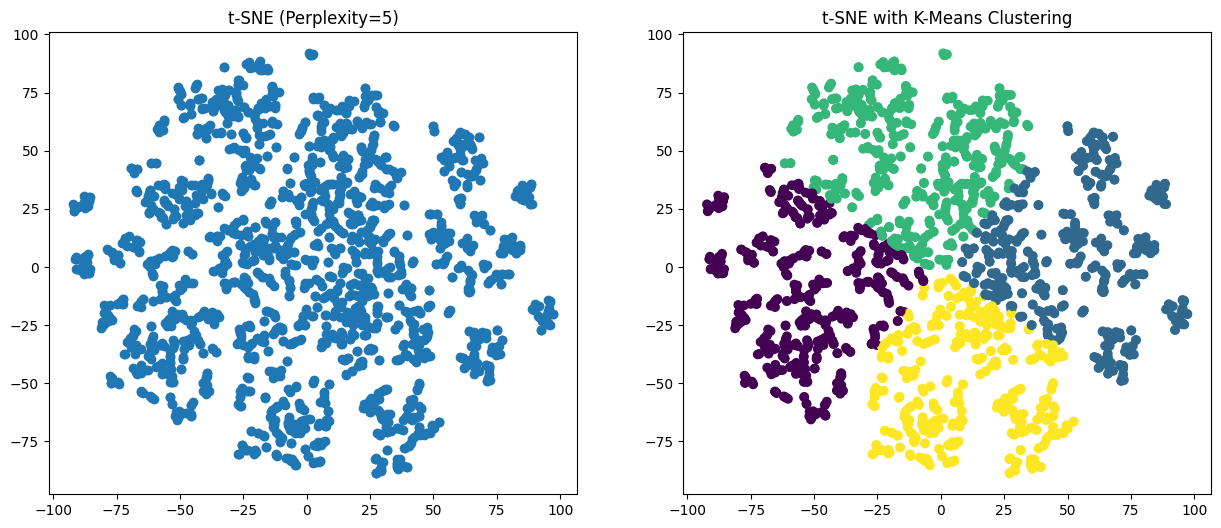

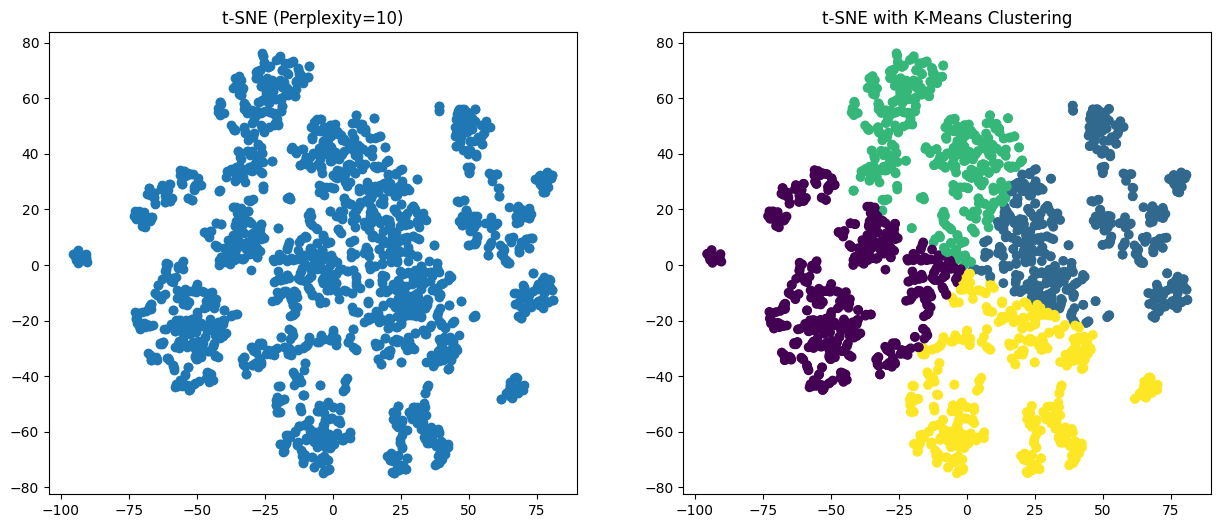

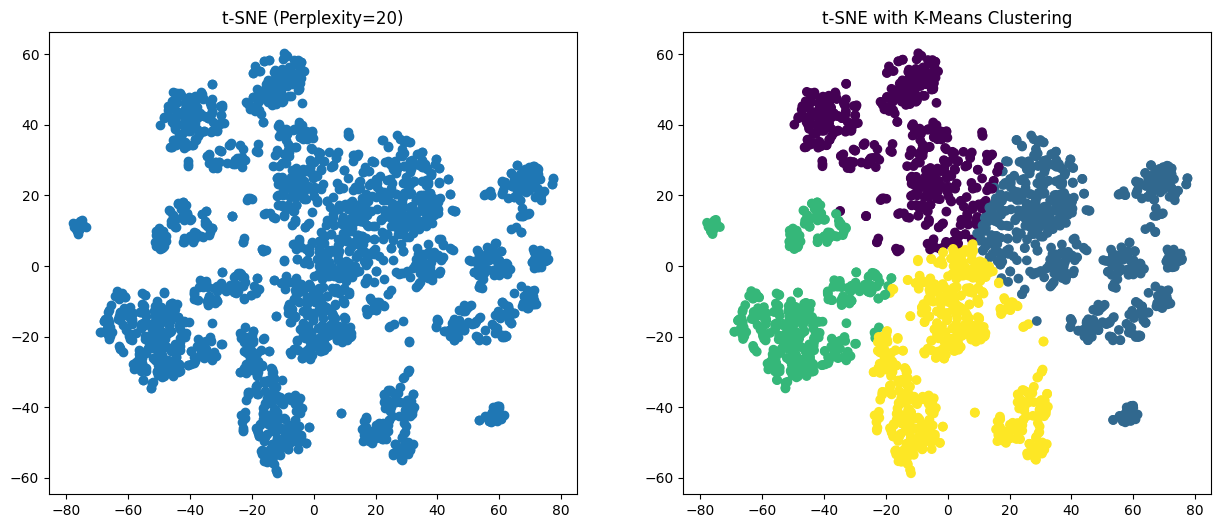

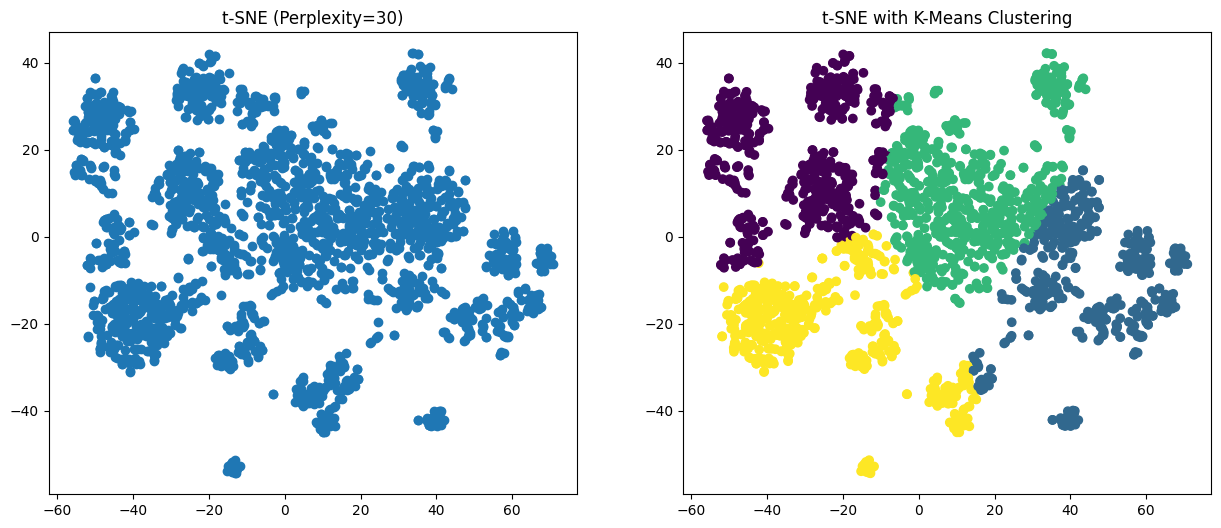

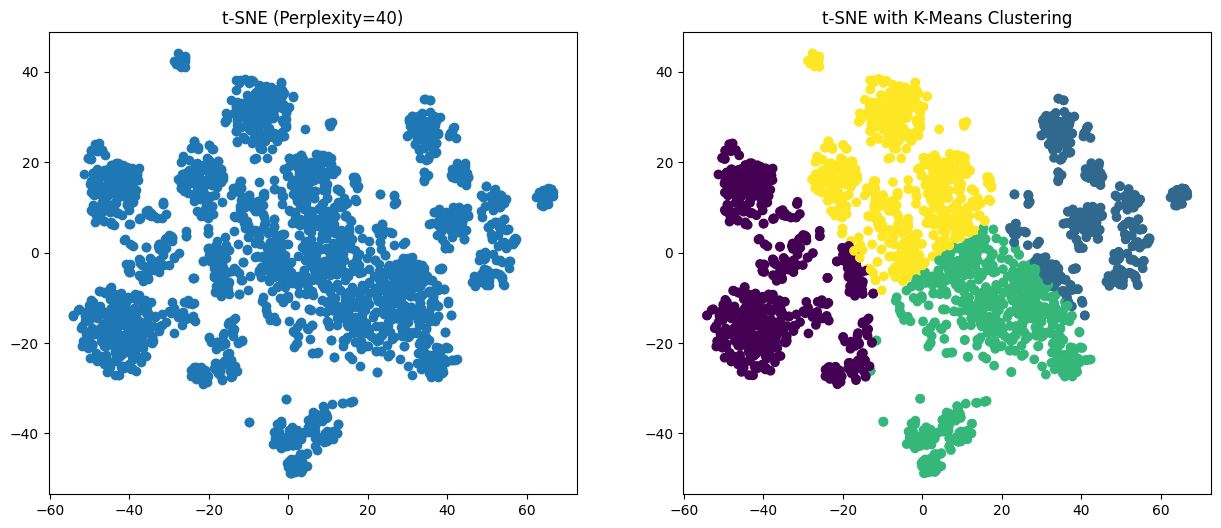

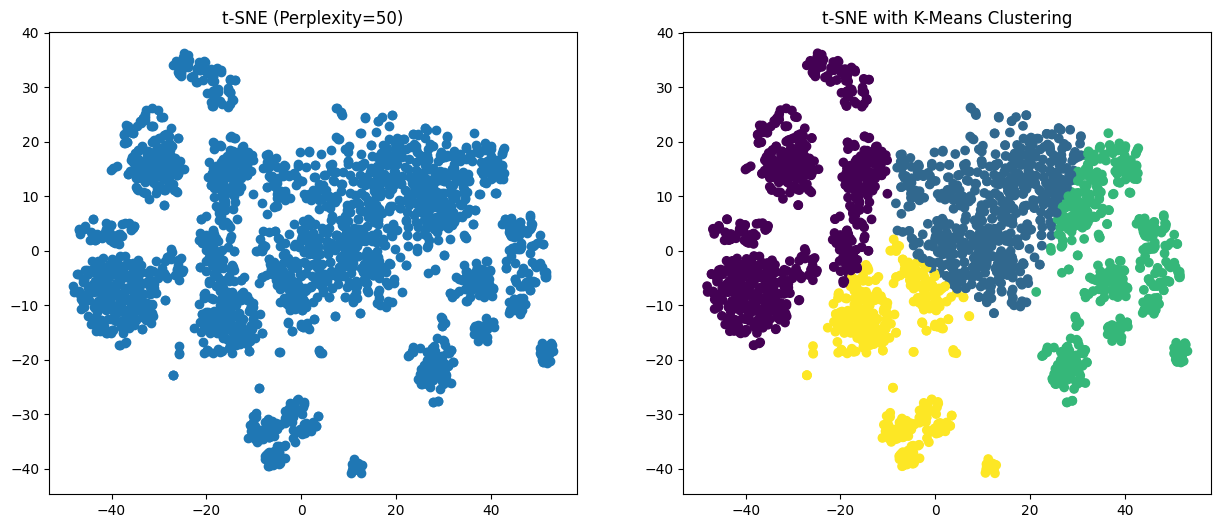

In [366]:
# Create the PCA pipeline
X_transformed=preprocessor.fit_transform(marketing)

# insert your code here
perplexities = [5, 10, 20, 30, 40, 50]

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_tsne = tsne.fit_transform(X_transformed)  # Assuming X is your data

    n_clusters = 4  # You can adjust the number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_tsne)

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1])  # Scatter plot of t-SNE components
    plt.title(f"t-SNE (Perplexity={perplexity})")

    # Visualize the clusters
    plt.subplot(1,2,2)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis')
    plt.title('t-SNE with K-Means Clustering')
    plt.show()

    plt.show()

<font color=magenta>

<b>Effect of Perplexity on Cluster Formation:</b>
* The t-SNE plots exhibit a clear transition in cluster formation as the perplexity value increases. At lower perplexity (5 and 10), the data points appear more dispersed, and several small clusters emerge. This indicates that t-SNE is capturing much of the local structure of the data. As the perplexity increases (20 to 50), the clusters become less fragmented and more cohesive, suggesting a shift from local to more global structure representation.

* The final selected perplexity of 30 for t-SNE leads to a balanced visualization where the clusters are neither too dispersed nor too aggregated.


Use of GenAI:

For paraphrasing our rough notes if inferences from the data observed, we took the liberty to use Generative AI for rewording our textual observations.

# NOTE
We **strongly** recommend restarting your kernel and running your complete notebook from top to bottom
before submitting your work to Canvas in both HTML and IPYNB formats.